# Segmenting and Clustering Neighborhoods in Toronto Part 3

## 1) Importing  Packages

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import colorsys
import folium

## 2) Read csv from part 2

In [3]:
df = pd.read_csv('toronto2.csv')
df.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


## 3) Data Analyses

In [4]:
df.describe()
# nothing interesting, show only langitude and Latitude cus they are in float format

,Latitude,Longitude
count,103.000000,103.000000
mean,43.704608,-79.397153
std,0.052463,0.097146
min,43.602414,-79.615819
25%,43.660567,-79.464763
50%,43.696948,-79.388790
75%,43.745320,-79.340923
max,43.836125,-79.160497


In [7]:
df.info()
# we got 3 String/Object format and 2 float variables. 5 Colomns and 103 rows. 4.1 KB on memory relativly small

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
Postcode         103 non-null object
Borough          103 non-null object
Neighbourhood    103 non-null object
Latitude         103 non-null float64
Longitude        103 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


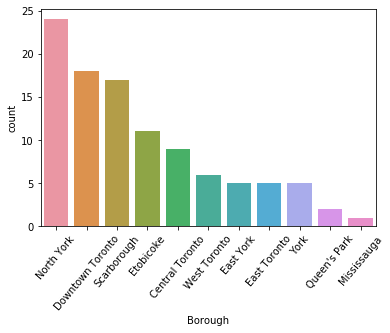

In [6]:
plt.xticks(rotation=50)
sns.countplot(x="Borough", data=df,
             order = df['Borough'].value_counts().index)
# New York Borough is more frequant and Mississuaga is less frequant 

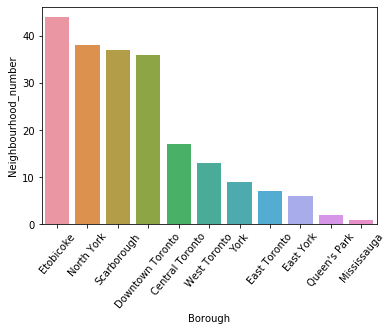

In [8]:
# Count number of Neighbourhood for each Borough
counter = []
for j in df['Neighbourhood'] :
    count = 1
    for i in j: 
        if i == ',': 
            count = count + 1
    counter.append(count)
    
df['Neighbourhood_number'] = counter

plt.xticks(rotation=50)
ax = sns.barplot(x=df.groupby(["Borough"]).sum().index, y="Neighbourhood_number", data=df.groupby(["Borough"]).sum(), 
                 order = df.groupby(["Borough"]).sum().sort_values(by = 'Neighbourhood_number', ascending= False).index )
#Etobicoke has the most neighborhood and Mississuaga has the least

In [10]:
# I put the coordinates on a map to see their location

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=1,
                        weight=12).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

this_map

## all the coordinates are in the same place (toronto), it's good news

## 4) Data preprocess

In [21]:
df = pd.read_csv('toronto2.csv')

## i drop Postcode column from dataframe cuz it is unique and have no correlation with other features
df.drop(['Postcode'], axis=1, inplace = True)

In [22]:
# i Count number of Neighbourhood for each Borough same as data analyses part
counter = []
for j in df['Neighbourhood'] :
    count = 1
    for i in j: 
        if i == ',': 
            count = count + 1
    counter.append(count)

df['Neighbourhood_number'] = counter

df.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3
3,Scarborough,Woburn,43.770992,-79.216917,1
4,Scarborough,Cedarbrae,43.773136,-79.239476,1
5,Scarborough,Scarborough Village,43.744734,-79.239476,1
6,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,3
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3
8,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,3
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2


In [23]:
#i split neighborhood to columns. 
#each column represents a neighborhood. if the neighborhood exists then the value of the line takes a 1 if no it takes a 0
#do not ask me why I did it, it's an intuission =)

df_tmp = pd.DataFrame(df.Neighbourhood.str.split(',').tolist(), columns=['Neighbourhood_1','Neighbourhood_2','Neighbourhood_3','Neighbourhood_4','Neighbourhood_5','Neighbourhood_6','Neighbourhood_7','Neighbourhood_8'])
df_tmp.fillna(' ', inplace = True)
columns = np.unique(df_tmp[['Neighbourhood_1','Neighbourhood_2','Neighbourhood_3','Neighbourhood_4','Neighbourhood_5','Neighbourhood_6','Neighbourhood_7','Neighbourhood_8']].values)

In [24]:
df_tmp2 = pd.DataFrame(np.zeros((103, 208)), columns=columns)

In [25]:
h=0
for i in df['Neighbourhood']:
    for j in df_final.columns:
        if j in i :
            df_tmp2[j][h] = 1
    h=h+1

In [26]:
df_final = pd.concat([df, df_tmp2], axis = 1)
df_final.drop([' '], axis = 1, inplace = True)
df_final.drop(['Neighbourhood'], axis = 1, inplace = True)
df_final.head(10)

,Borough,Latitude,Longitude,Neighbourhood_number,Adelaide,Agincourt,Agincourt North,Albion Gardens,Alderwood,Bathurst Manor,...,Willowdale South,Willowdale West,Wilson Heights,Woburn,Woodbine Gardens,Woodbine Heights,York Mills,York Mills West,York University,Yorkville
0,Scarborough,43.806686,-79.194353,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Scarborough,43.784535,-79.160497,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Scarborough,43.763573,-79.188711,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Scarborough,43.770992,-79.216917,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Scarborough,43.773136,-79.239476,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Scarborough,43.744734,-79.239476,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Scarborough,43.727929,-79.262029,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Scarborough,43.711112,-79.284577,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Scarborough,43.716316,-79.239476,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Scarborough,43.692657,-79.264848,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5) Data transformation and Modelistion

In [28]:
#I apply hot encoding on the data with Drop first = True to avoid multicollinearity
dummy_df = pd.get_dummies(df_final, drop_first = True)

In [29]:
#I normalize with the standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(dummy_df)

In [30]:
# I create an object of the algorithm K means and I make him learn by giving him 3 cluster as argument for the moment
kmeans = KMeans(n_clusters=3, random_state=2).fit(X)
results = kmeans.labels_

In [31]:
# I create 3 colors for each cluster to display it on the map
df_mod = df.copy()
colors = ['red', 'blue', 'green']
df_mod['clusters'] = results
df_mod.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2,1
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,1
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3,1
3,Scarborough,Woburn,43.770992,-79.216917,1,1
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,1
5,Scarborough,Scarborough Village,43.744734,-79.239476,1,1
6,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,3,1
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3,1
8,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,3,1
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2,1


In [32]:
# lets display on the map

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=1,
                        color = np.array(colors)[point.clusters],
                        weight=12).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_mod.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

this_map

In [34]:
#hmm it's not good, he posted only 2 locations that correspond each to a cluster and the rest represents another cluster
#I made a mistake by adding the 200 columns on neiborhood, I will do without this time

dummy_df = pd.get_dummies(df_final[['Borough', 'Latitude', 'Longitude', 'Neighbourhood_number']], drop_first = True)
scaler = StandardScaler()
X = scaler.fit_transform(dummy_df)
kmeans = KMeans(n_clusters=3, random_state=2).fit(X)
results = kmeans.labels_
df_mod = df.copy()
colors = ['red', 'blue', 'green']
df_mod['clusters'] = results
df_mod.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2,2
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,2
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3,2
3,Scarborough,Woburn,43.770992,-79.216917,1,2
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,2
5,Scarborough,Scarborough Village,43.744734,-79.239476,1,2
6,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,3,2
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3,2
8,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,3,2
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2,2


In [35]:
# lets display on the map

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=1,
                        color = np.array(colors)[point.clusters],
                        weight=12).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_mod.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

this_map

In [37]:
#ah that's better, I'm going to add more cluster number and see if it works

dummy_df = pd.get_dummies(df_final[['Borough', 'Latitude', 'Longitude', 'Neighbourhood_number']], drop_first = True)
scaler = StandardScaler()
X = scaler.fit_transform(dummy_df)
kmeans = KMeans(n_clusters=7, random_state=2).fit(X)
results = kmeans.labels_
df_mod = df.copy()
colors = ['red', 'blue', 'green', 'yellow', 'black', 'grey', 'magenta']
df_mod['clusters'] = results
df_mod.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2,4
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,4
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3,4
3,Scarborough,Woburn,43.770992,-79.216917,1,4
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,4
5,Scarborough,Scarborough Village,43.744734,-79.239476,1,4
6,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,3,4
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3,4
8,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,3,4
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2,4


In [38]:
# lets display on the map

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=1,
                        color = np.array(colors)[point.clusters],
                        weight=12).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_mod.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

this_map

In [50]:
#the cluster in yellow disperses a little, I think 7 clusters is too much
#Let's try with 5

dummy_df = pd.get_dummies(df_final[['Borough', 'Latitude', 'Longitude', 'Neighbourhood_number']], drop_first = True)
scaler = StandardScaler()
X = scaler.fit_transform(dummy_df)
kmeans = KMeans(n_clusters=5, random_state=2).fit(X)
results = kmeans.labels_
df_mod = df.copy()
colors = ['red', 'blue', 'green', 'yellow', 'black']
df_mod['clusters'] = results
df_mod.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2,3
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,3
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3,3
3,Scarborough,Woburn,43.770992,-79.216917,1,3
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,3
5,Scarborough,Scarborough Village,43.744734,-79.239476,1,3
6,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,3,3
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3,3
8,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,3,3
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2,3


In [51]:
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=1,
                        color = np.array(colors)[point.clusters],
                        weight=12).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_mod.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

this_map

In [52]:
#the problem persists, let's try with Longitude and Latitude as features

dummy_df = pd.get_dummies(df_final[['Latitude', 'Longitude']], drop_first = True)
scaler = StandardScaler()
X = scaler.fit_transform(dummy_df)
kmeans = KMeans(n_clusters=5, random_state=2).fit(X)
results = kmeans.labels_
df_mod = df.copy()
colors = ['red', 'blue', 'green', 'yellow', 'black']
df_mod['clusters'] = results
df_mod.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2,1
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,1
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3,1
3,Scarborough,Woburn,43.770992,-79.216917,1,1
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,1
5,Scarborough,Scarborough Village,43.744734,-79.239476,1,1
6,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,3,1
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3,2
8,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,3,1
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2,3


In [53]:
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=1,
                        color = np.array(colors)[point.clusters],
                        weight=12).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_mod.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

this_map

In [54]:
#that's perfect

## 6) Show result

In [55]:
cluster_1 = df_mod[df_mod ['clusters'] == 0]
cluster_1.head()

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
81,York,"The Junction North,Runnymede",43.673185,-79.487262,2,0
82,West Toronto,"High Park,The Junction South",43.661608,-79.464763,2,0
83,West Toronto,"Parkdale,Roncesvalles",43.648960,-79.456325,2,0
84,West Toronto,"Runnymede,Swansea",43.651571,-79.484450,2,0
86,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,1,0


In [56]:
cluster_2 = df_mod[df_mod ['clusters'] == 1]
cluster_2.head()

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2,1
1,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,1
2,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3,1
3,Scarborough,Woburn,43.770992,-79.216917,1,1
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,1


In [57]:
cluster_3 = df_mod[df_mod ['clusters'] == 2]
cluster_3.head()

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
7,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,3,2
17,North York,Hillcrest Village,43.803762,-79.363452,1,2
18,North York,"Fairview,Henry Farm,Oriole",43.778517,-79.346556,3,2
19,North York,Bayview Village,43.786947,-79.385975,1,2
20,North York,"Silver Hills,York Mills",43.757490,-79.374714,2,2


In [58]:
cluster_4 = df_mod[df_mod ['clusters'] == 3]
cluster_4.head()

,Borough,Neighbourhood,Latitude,Longitude,Neighbourhood_number,clusters
9,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2,3
36,East York,Woodbine Heights,43.695344,-79.318389,1,3
37,East Toronto,The Beaches,43.676357,-79.293031,1,3
40,East York,East Toronto,43.685347,-79.338106,1,3
41,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,2,3
